# 项目：调查数据集（tmdb电影数据集）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
这个数据集是一份imdb电影网的每个电影的相关信息的数据集合，这份数据包括了电影的名字，导演名，类型，投资收入等等数据。对于这份数据，我想探索的是观众对这个电影的评价与什么有关，是投资？收益？还是导演本身，又或者投资是否与收益是正相关的关系？越大的投资是否能得到越大的收益。

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
# 务必包含一个‘magic word’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## 数据整理

### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
mov = pd.read_csv('tmdb-movies.csv')
mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
mov.shape

(10866, 21)

In [4]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
print(sum((mov.isnull().sum(axis=1)>0)))
## 检查行缺值

8874


In [6]:
print(mov.duplicated().sum())
## 检查重复行

1



### 数据清理


## 这个数据有8874个行有缺失值，一个重复行，以及分析过程中不需要的列，需要去除掉这些有问题的数据

In [7]:
mov.drop(['homepage'],axis=1,inplace=True)
mov.drop(['overview'],axis=1,inplace=True)
mov.drop(['original_title'],axis=1,inplace=True)
mov.drop(['tagline'],axis=1,inplace=True)
mov.drop(['production_companies'],axis=1,inplace=True)
mov.drop(['cast'],axis=1,inplace=True)
mov.drop(['imdb_id'],axis=1,inplace=True)
mov.drop(['keywords'],axis=1,inplace=True)
mov.drop(['budget'],axis=1,inplace=True)
mov.drop(['revenue'],axis=1,inplace=True)
mov.drop(['release_date'],axis=1,inplace=True)
## 丢弃不需要的行

In [8]:
mov.head()

,id,popularity,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
mov.isnull().sum()
## 检查缺失行

id               0
popularity       0
director        44
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [10]:
mov.dropna(inplace= True)
## 丢弃缺失行

In [11]:
mov.isnull().sum().any()
## 检查缺失行

False

In [12]:
mov.drop_duplicates(inplace= True)
## 丢弃重复行

In [13]:
mov.duplicated().sum().any()

False

In [14]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 10 columns):
id              10800 non-null int64
popularity      10800 non-null float64
director        10800 non-null object
runtime         10800 non-null int64
genres          10800 non-null object
vote_count      10800 non-null int64
vote_average    10800 non-null float64
release_year    10800 non-null int64
budget_adj      10800 non-null float64
revenue_adj     10800 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 928.1+ KB


In [15]:
# 检查数据类型
print('genres:',type(mov['genres'][3]))
print('director:',type(mov['director'][3]))

genres: <class 'str'>
director: <class 'str'>


In [16]:
mov['budget_adj'] = mov['budget_adj'].astype(int)

In [17]:
mov['revenue_adj'] = mov['revenue_adj'].astype(int)

In [18]:
mov.head()

,id,popularity,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939,348161292
2,262500,13.112507,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955,271619025
3,140607,11.173104,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919,1902723129
4,168259,9.335014,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,174799923,1385748801


<a id='eda'></a>
## 探索性数据分析

### 研究问题 1:哪个导演的平均电影评分最高？哪个导演最受欢迎

## 平均评分最高的导演

In [22]:
mov.shape

(10800, 10)

In [24]:
df = mov
df_clean = df[df['director'].notnull()]
df_clean = df_clean.drop('director', axis=1).join(df_clean['director'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('director'))
df_clean.shape

## 将用| 分割的导演拆分成两行，方便统计导演评分 和产量

(11855, 10)

In [23]:
df_clean.groupby('director')['vote_average'].mean().sort_values(ascending=False).head(10)

director
Mark Cousins              9.2
Derek Frankowski          8.8
David Mallet              8.7
Michael Henry Wilson      8.5
Curt Morgan               8.5
Saul Swimmer              8.5
Jorge RamÃ­rez SuÃ¡rez    8.4
David Dawkins             8.4
Chris Hegedus             8.4
Anthony Mandler           8.4
Name: vote_average, dtype: float64

## 产出量最高的导演

In [25]:
df_clean['director'].value_counts().head()

Woody Allen         46
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
Ridley Scott        23
Name: director, dtype: int64

##  所导电影相对页面被查看次数最多的导演

In [26]:
df_clean.groupby('director')['popularity'].mean().sort_values(ascending=False).head(10)


director
Colin Trevorrow       16.696886
David Leitch          11.422751
Chad Stahelski        11.422751
Juno John Lee          8.411577
Alan Taylor            6.883129
Peter Richardson       6.668990
Christopher Nolan      6.195521
Alex Garland           6.118847
Patrick Tatopoulos     5.806897
Wes Ball               5.553082
Name: popularity, dtype: float64

### 研究问题 2：评分和投资，收益，页面点击次数，年份有没有关系？

## 评分的分布  答：正态分布

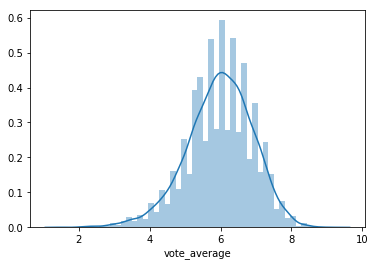

In [46]:
sns.distplot(mov['vote_average'])

## 相对页面查看次数的分布  答：正偏态

Text(0.5,1,'popularity histogram')

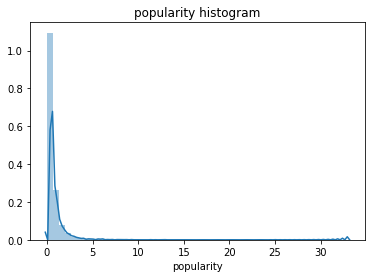

In [35]:
sns.distplot(mov['popularity']).set_title('popularity histogram')


# 探索预算与收入的关系  答：正相关

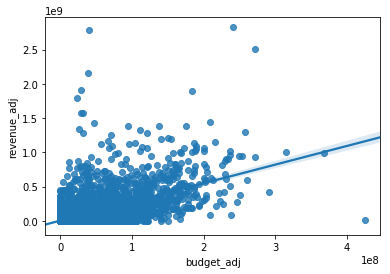

In [95]:
sns.regplot(x=mov['budget_adj'],y=mov['revenue_adj'])

#  探索收入与评分的关系  答：正相关

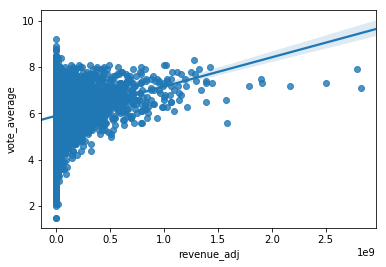

In [110]:
sns.regplot(x=mov['revenue_adj'],y=mov['vote_average'])

## 探索预算和评分的关系 答：正相关

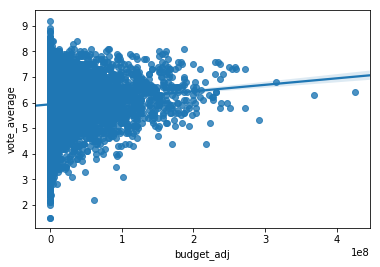

In [51]:
sns.regplot(x=mov['budget_adj'],y=mov['vote_average'])

## 探索评分在不同年份的平均值

Text(0,0.5,'average vote')

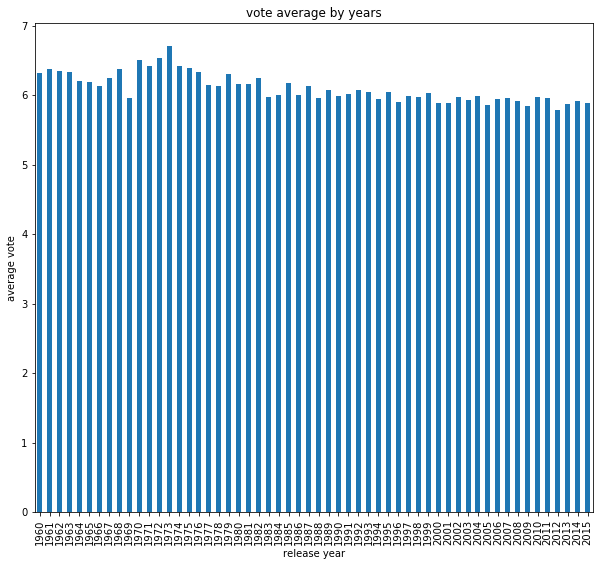

In [29]:
mov.groupby('release_year')['vote_average'].mean().plot(kind = 'bar',title="vote average by years",figsize=(10, 9))
plt.xlabel('release year')
plt.ylabel('average vote')

## 年份中的电影数量

Text(0,0.5,'number of movies released')

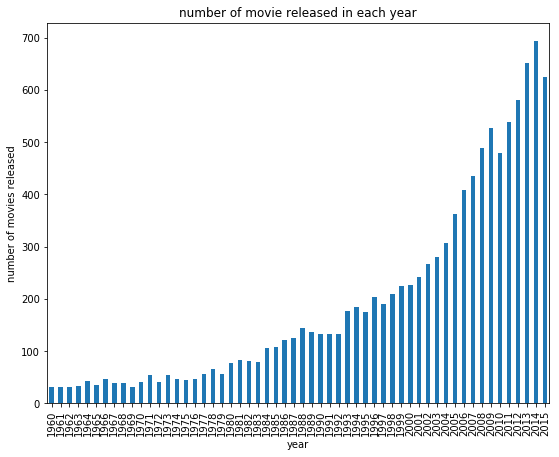

In [30]:
mov['release_year'].value_counts().sort_index().plot(kind='bar',title='number of movie released in each year',figsize=(9,7))
plt.xlabel('year')
plt.ylabel('number of movies released')
## 年份中出的电影数量

# 探索受欢迎程度（相对页面查看数量）与评分的关系 答：正相关

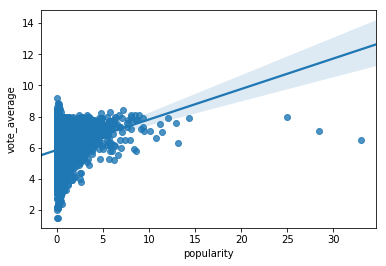

In [50]:
sns.regplot(x=mov['popularity'],y=mov['vote_average'])

<a id='conclusions'></a>
## 结论

从以上的探索中我们可以发现，
首先就导演来说，最高产前五的导演是
Woody Allen         46
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
Ridley Scott        23

平均分最高的导演（前五)
Mark Cousins    9.2
Derek Frankowski    8.8
David Mallet   8.7
Michael Henry Wilson   8.5
Curt Morgan       8.5

最受欢迎的导演（前五）
Colin Trevorrow     16.696886
David Leitch        11.422751
Chad Stahelski      11.422751
Juno John Lee       6.883129

评分与受欢迎程度，收入，投资都是正相关，但是是不是，高投资导致了高评分，高评分导致了高收入呢？评分与点击数量、收入投资之间是否存在因果关系，这还有待于我们的进一步探究。

有趣的是，普遍上年份靠前的评分较高，但年份靠前的电影两也少，这是不是说明现在电影质量越来越低了？还是由于以前的电影因为技术资金等因素的限制使得电影更加精品？

这份调查数据并不能囊括所有在这些年分内发行的所有电影，只是美国的电影而已，所以这个数据存在一定的局限性。评分也可能和别的因素存在关系，比如genres，甚至是电影的名字，但在这次的探究中并没有涉及到，尤其是电影的名字对人们评分时施加的心理影响难以用数据去判断。我们还需要更多的心理学知识和可靠的大量的数据去探究。


In [75]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255